<a href="https://colab.research.google.com/github/kozz84/Udemy/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Python Data/USA_Housing.csv')
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [ ]:
df.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [ ]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


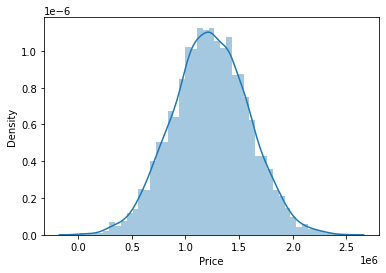

In [ ]:
sns.distplot(df['Price'], kde=True)

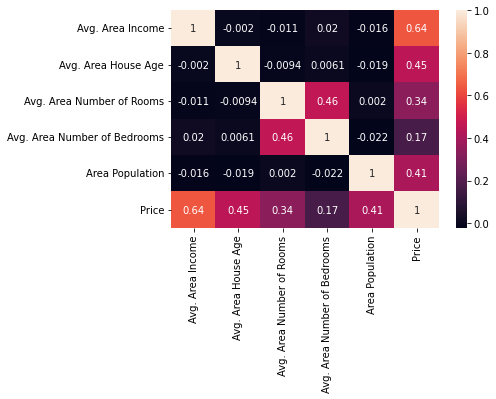

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
x = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
x

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population  
0                             4.09     23086.800503  
1                             3.09     40173.072174  
2                             5.13     36882.159400  
3                             3.26     34310.242831  
4                             4.23     26354.109472  
...                            ...              ...  
4995                          3.46     22837.361035  
4996                          4.02     25616.115489  
4997                          2.13     33266.145490  
4998                          5.44     42625.620156  
4999                          4.07     46501.283803  

[5000 rows x 5 columns]

In [ ]:
y = df['Price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)

-2640159.7968526958


In [ ]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [ ]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [ ]:
cdf = pd.DataFrame(lm.coef_,X_train.columns, columns=['Coeff'])
cdf

Coeff
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420

In [ ]:
predictions = lm.predict(X_test)

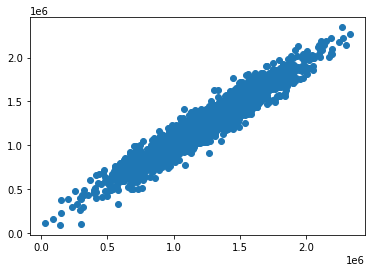

In [ ]:
plt.scatter(y_test, predictions)

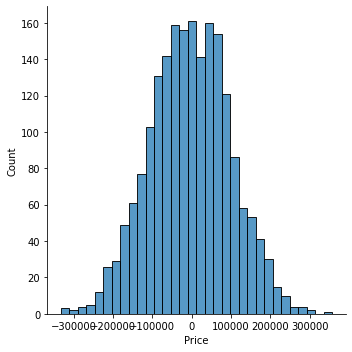

In [ ]:
sns.displot(y_test-predictions)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test,predictions)

82288.22251914942

In [ ]:
metrics.mean_squared_error(y_test,predictions)

10460958907.20898

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.82922290899

# Logistic regression titanic

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Python Data/titanic_test.csv')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Python Data/titanic_train.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


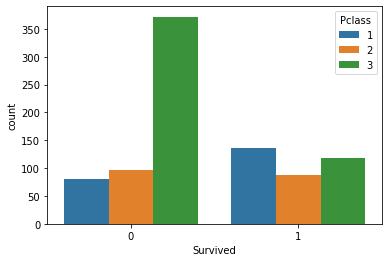

In [ ]:
sns.countplot(data=train, x='Survived', hue='Pclass')

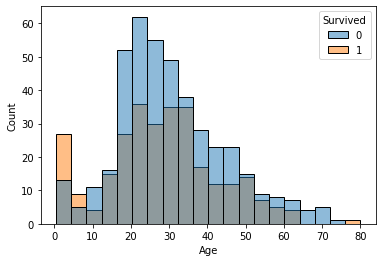

In [ ]:
sns.histplot(data=train, x='Age', hue='Survived')

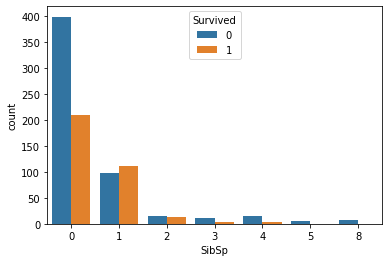

In [ ]:
sns.countplot(x='SibSp', data=train, hue='Survived')

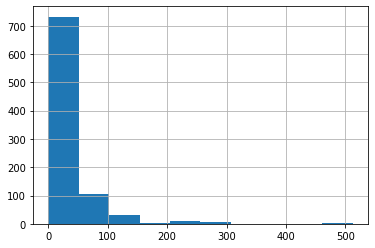

In [ ]:
train['Fare'].hist()

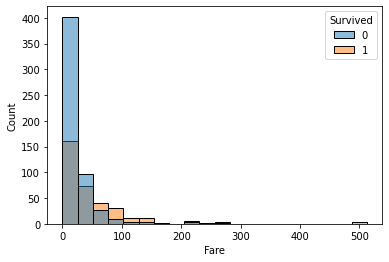

In [ ]:
sns.histplot(data=train, x='Fare', hue='Survived', bins=20)

In [ ]:
train[pd.notnull(train['Age'])].groupby('Pclass').mean()

PassengerId  Survived        Age     SibSp     Parch       Fare
Pclass                                                                 
1        463.962366  0.655914  38.233441  0.451613  0.408602  87.961582
2        447.156069  0.479769  29.877630  0.427746  0.404624  21.471556
3        441.219718  0.239437  25.140620  0.585915  0.456338  13.229435

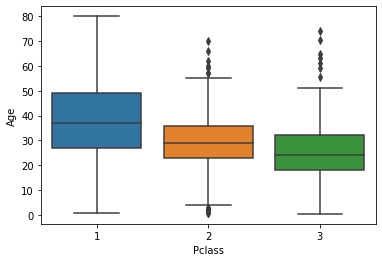

In [ ]:
sns.boxplot(data=train, x='Pclass', y='Age')

In [ ]:
x=0
for i in train['Age']:
    if pd.isnull(i):
        if train['Pclass'][x] == 3:
            train['Age'][x] = 25
        if train['Pclass'][x] == 2:
            train['Age'][x] = 30
        if train['Pclass'][x] == 2:
            train['Age'][x] = 38 
    x+=1

In [ ]:
train.drop('Cabin', axis=1,inplace=True)

In [ ]:
train.dropna(inplace=True)

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [ ]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [ ]:
train = pd.concat([train,sex,embark],axis=1)

In [ ]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  male  Q  S  
0      0         A/5 21171   7.2500        S     1  0  1  
1      0          PC 17599  71.2833        C     0  0  0  
2      0  STON/O2. 3101282   7.9250        S     0  0  1  
3      0            113803  53.1000        S     0  0  1  
4      0            373450   8.0500        S     1  0  1

In [ ]:
train.drop(['Sex','Ticket','Name','Embarked'],axis=1,inplace=True)

In [ ]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [ ]:
train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

In [ ]:
y= train['Survived']
X = train.drop('Survived',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
logm = LogisticRegression()

In [ ]:
logm.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
predict = logm.predict(X_test)
print(accuracy_score(y_test,predict))

0.813953488372093


# Logistic regression advertistments

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
adv = pd.read_csv('/content/drive/MyDrive/Python Data/advertising.csv')

In [ ]:
adv.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [ ]:
sns.jointplot(data=adv, x='Age', y='Area Income', hue='Male')

In [ ]:
sns.jointplot(data=adv, x='Age', y='Daily Time Spent on Site', hue='Male', kind='kde')

In [ ]:
sns.jointplot(data=adv, y='Daily Internet Usage', x='Daily Time Spent on Site', hue='Male')

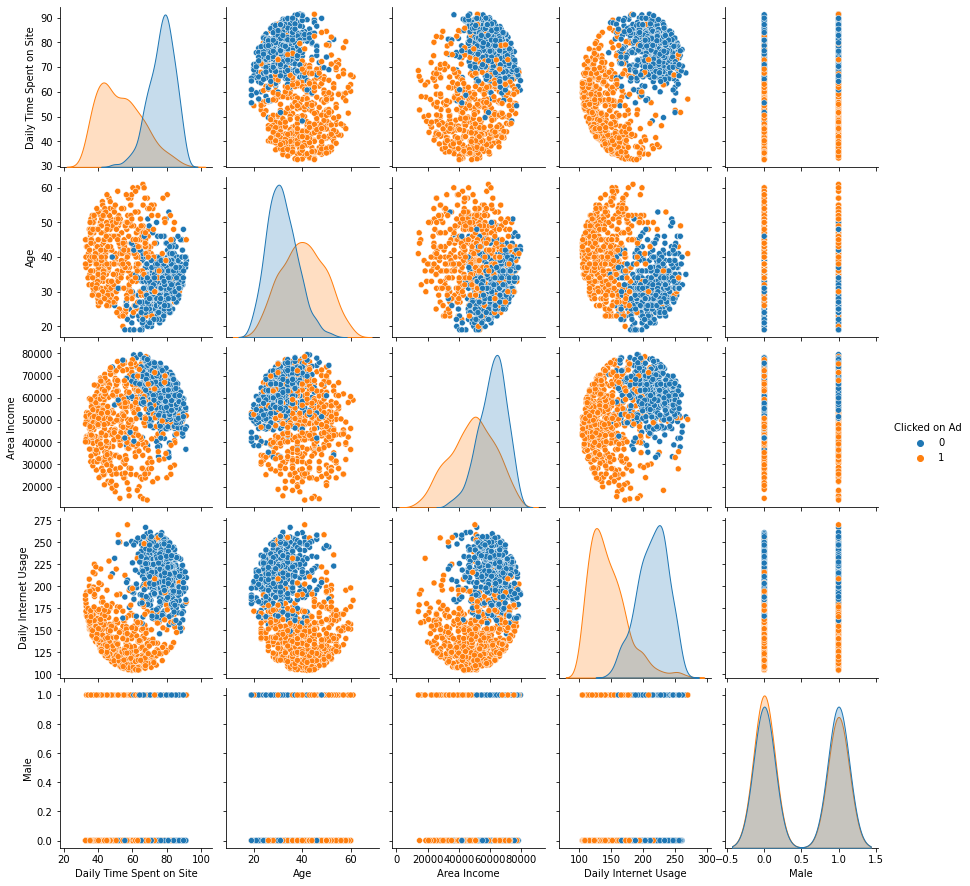

In [ ]:
sns.pairplot(adv, hue='Clicked on Ad')

In [ ]:
adv.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
y=adv['Clicked on Ad']
X = adv.drop(['Clicked on Ad','City','Country','Ad Topic Line' ,'Timestamp'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
lgmodel = LogisticRegression()

In [ ]:
lgmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predict = lgmodel.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test,predict))
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

0.9266666666666666
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

[[149   8]
 [ 14 129]]


# KNN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/drive/MyDrive/Python Data/Classified Data', index_col=0)

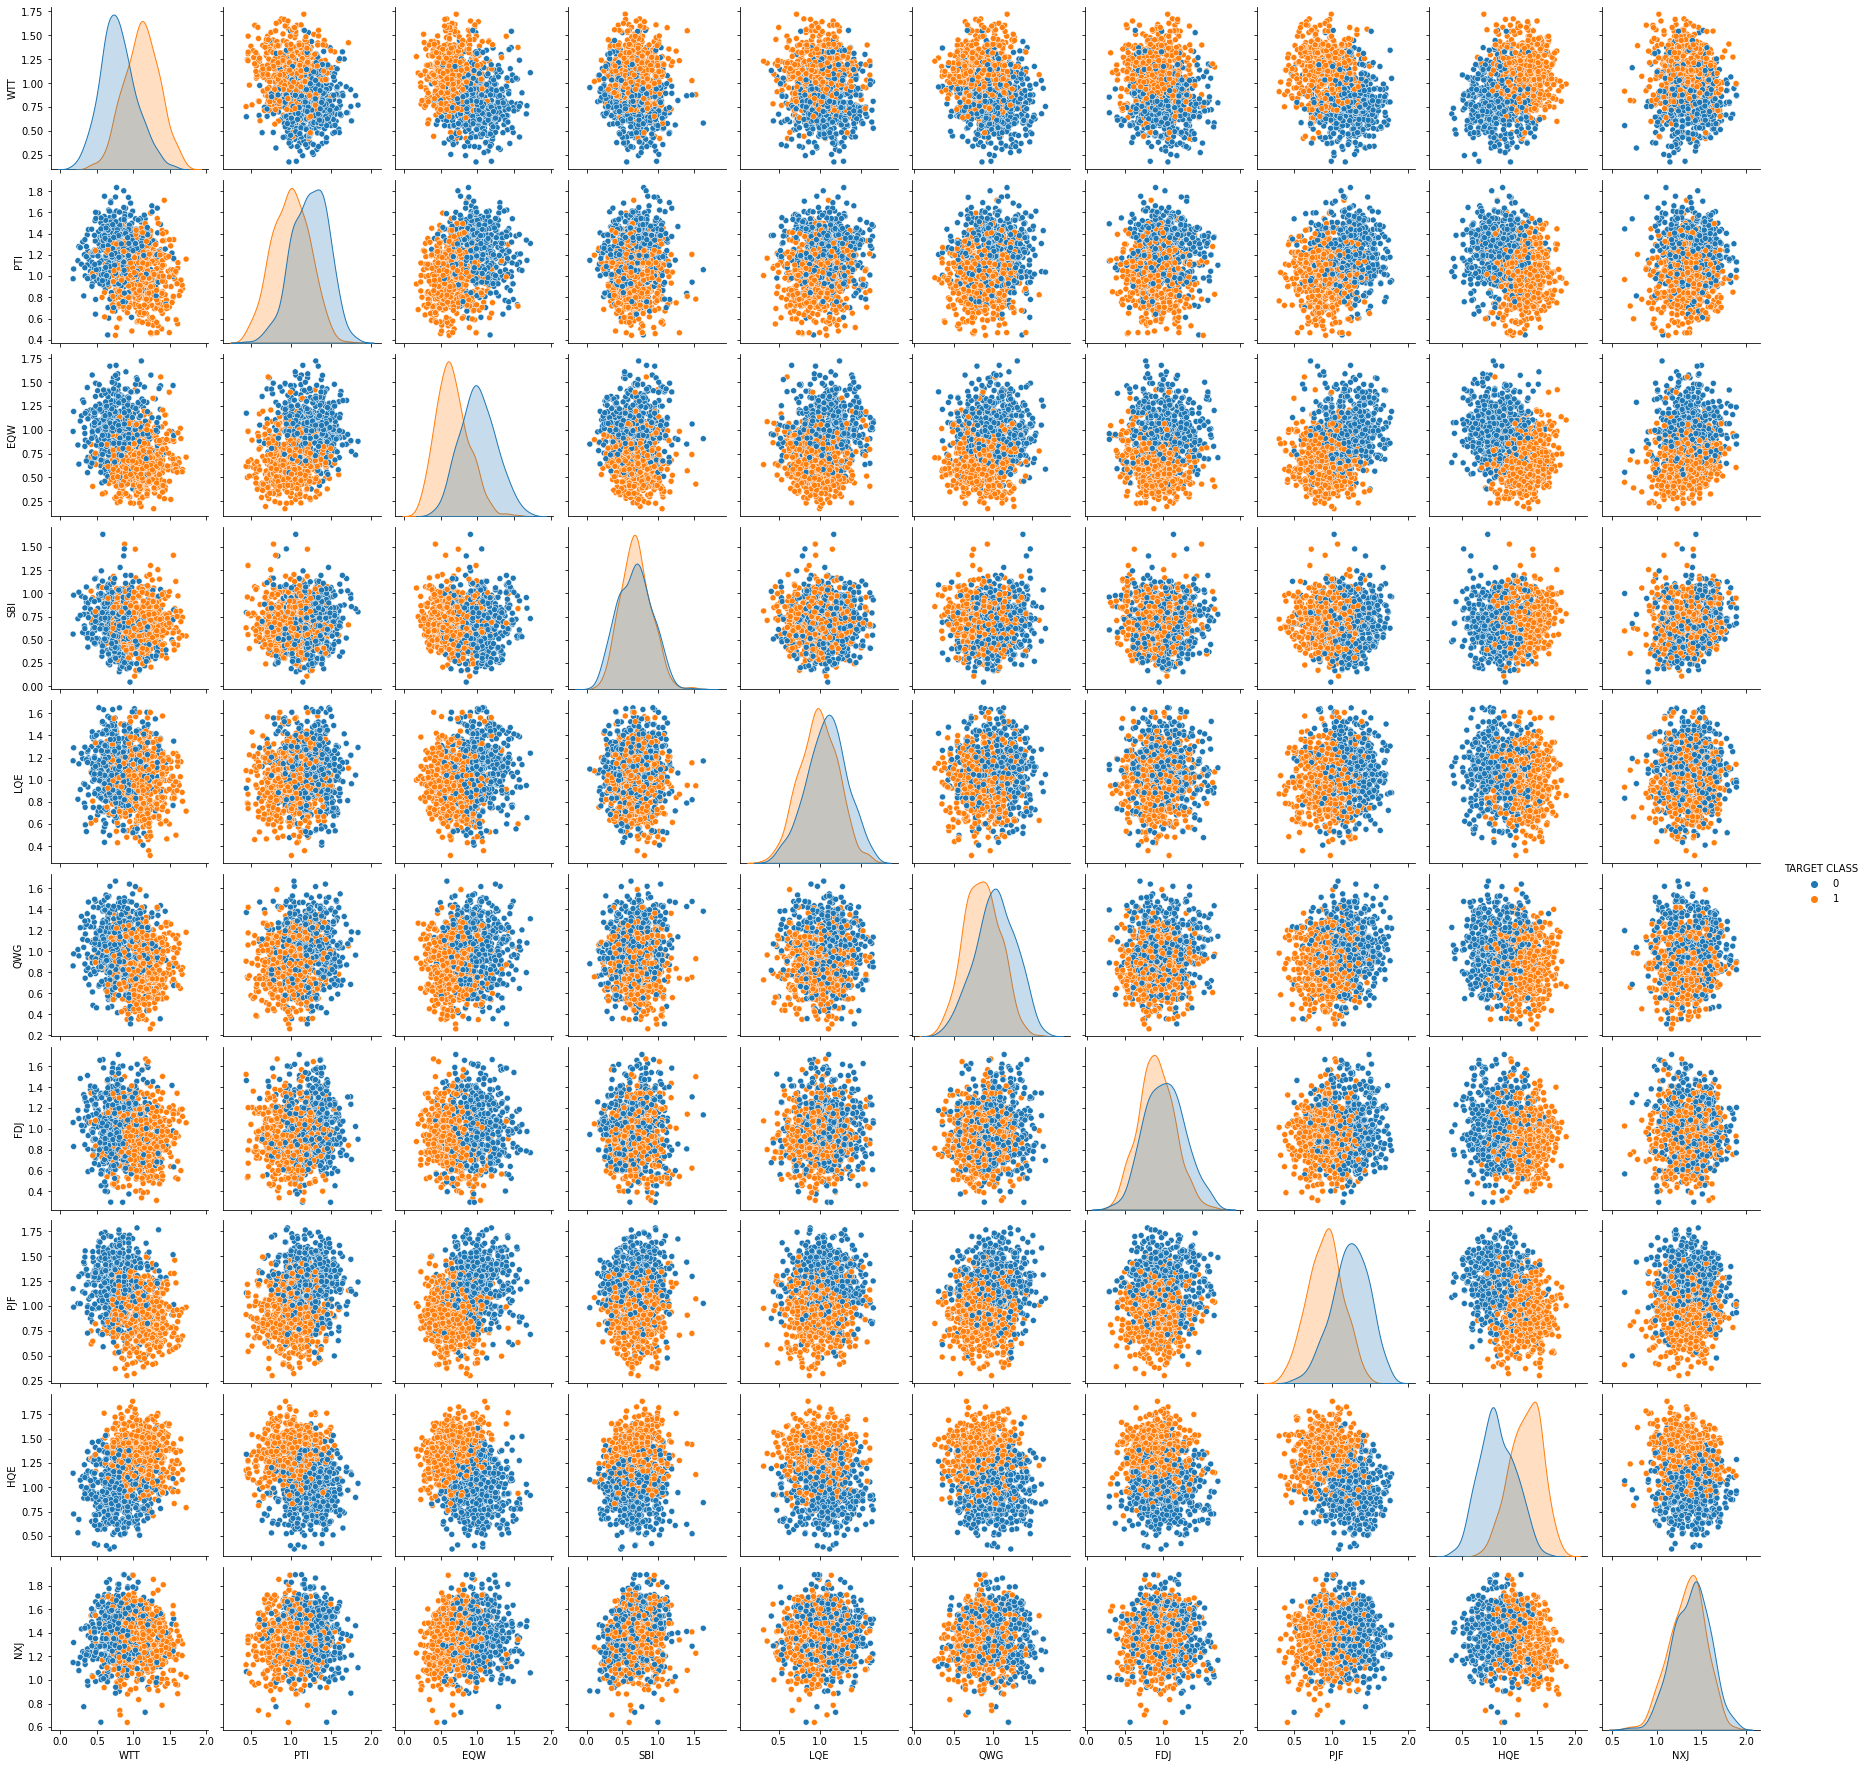

In [ ]:
sns.pairplot(data, hue='TARGET CLASS')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(data.drop('TARGET CLASS', axis=1))

StandardScaler()

In [ ]:
scaler_features = scaler.transform(data.drop('TARGET CLASS', axis=1))

In [ ]:
df_feature = pd.DataFrame(scaler_features,columns=data.columns[:-1])

In [ ]:
df_feature.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510

In [ ]:
normalized = pd.concat([df_feature, y], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_feature
y = data['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(df_feature, y, test_size=0.5, random_state=101)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
predict = knn.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test,predict))
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

0.918
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       250
           1       0.93      0.90      0.92       250

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500

[[233  17]
 [ 24 226]]


In [ ]:
error = []

In [ ]:
for i in range(1,40):
    knn =KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predict = knn.predict(X_test)
    error.append(accuracy_score(y_test,predict))
print(max(error))

0.954


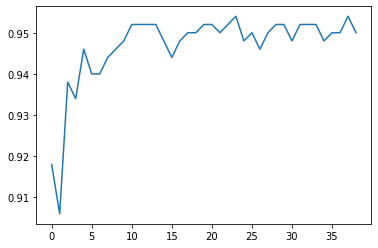

In [ ]:
plt.plot(error)

# KNN TEST

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/drive/MyDrive/Python Data/KNN_Project_Data')
data.head(1)

XVPM        GWYH         TRAT        TLLZ        IGGA         HYKR  \
0  1636.670614  817.988525  2565.995189  358.347163  550.417491  1618.870897   

          EDFS        GUUB         MGJM        JHZC  TARGET CLASS  
0  2147.641254  330.727893  1494.878631  845.136088             0

In [ ]:
sns.pairplot(data, hue='TARGET CLASS')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(data.drop("TARGET CLASS", axis =1))

StandardScaler()

In [ ]:
scaled_x = scaler.transform(data.drop("TARGET CLASS", axis =1))
data_scaled_x = pd.DataFrame(scaled_x,columns=data.columns[:-1])

In [ ]:
X = data.drop(['TARGET CLASS'], axis=1)
y = data['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
error = []

In [ ]:
for i in range(1,100):
    knn =KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predict = knn.predict(X_test)
    error.append(accuracy_score(y_test,predict))

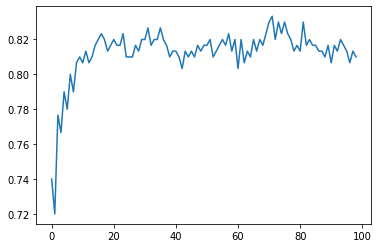

In [ ]:
plt.plot(error)

# Trees

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
spine = pd.read_csv('/content/drive/MyDrive/Python Data/kyphosis.csv')

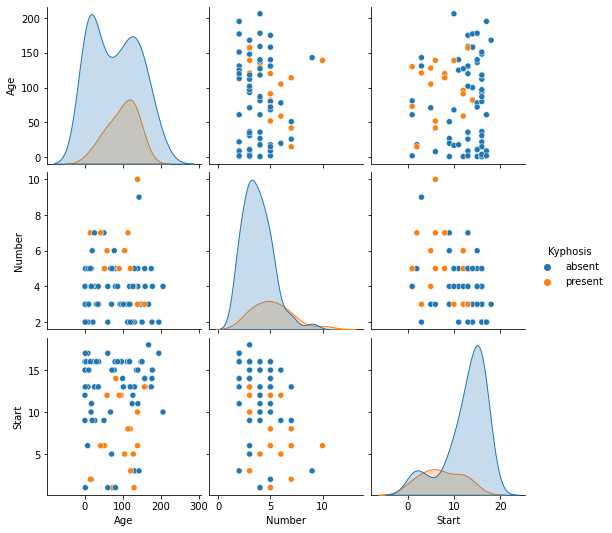

In [ ]:
sns.pairplot(spine, hue='Kyphosis')

In [ ]:
from sklearn.model_selection import train_test_split
X= spine.drop(['Kyphosis'], axis=1)
y= spine['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predict = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
print(accuracy_score(y_test,predict))

0.7272727272727273


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=1000)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=400)

In [ ]:
predict = dtree.predict(X_test)
print(accuracy_score(y_test,predict))

0.7272727272727273


# Trees test

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
loan = pd.read_csv('/content/drive/MyDrive/Python Data/loan_data.csv')
loan.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [ ]:
for col in loan.columns:
    sns.histplot(data=loan, x=col, hue='credit.policy')
    plt.title(col)
    plt.show()

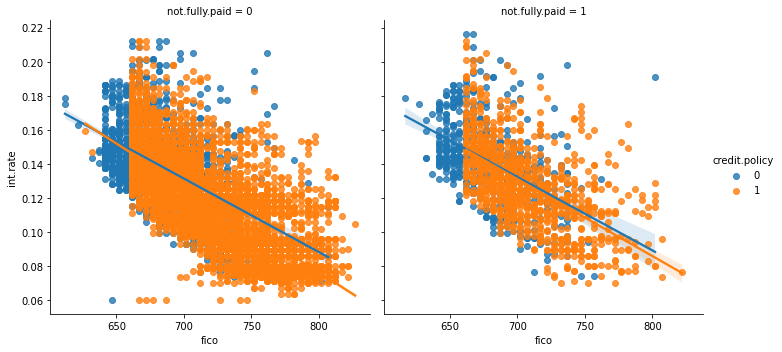

In [ ]:
sns.lmplot(data=loan, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid')

In [ ]:
pd.crosstab(loan['credit.policy'], loan['not.fully.paid'])

not.fully.paid     0     1
credit.policy             
0               1349   519
1               6696  1014

In [ ]:
loan['purpose'].unique()
len(loan['purpose'].unique())

7

In [ ]:
q=0
for i in loan['purpose'].unique():
    loan['purpose'].replace({i:q}, inplace=True)
    q+=1
loan['purpose'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
from sklearn.model_selection import train_test_split
X = loan.drop(['not.fully.paid'], axis=1)
y = loan['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7317327766179541
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2431
           1       0.19      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874

[[2006  425]
 [ 346   97]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8462073764787752
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.53      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874

[[2424    7]
 [ 435    8]]


# SKV Support Vector Machines



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [25]:
cancer_df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [9]:
from sklearn.model_selection import train_test_split

In [12]:
X = cancer_df
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.svm import SVC

In [15]:
model = SVC()

In [20]:
model.fit(X_train, y_train)

SVC()

In [23]:
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9521276595744681
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        67
           1       0.94      0.99      0.96       121

    accuracy                           0.95       188
   macro avg       0.96      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188

[[ 59   8]
 [  1 120]]


In [29]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [30]:
grid = GridSearchCV(SVC(),param_grid,verbose=3) 

In [33]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.623 total time=   0.1s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.618 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.618 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.618 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.618 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.623 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.618 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.618 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.618 total time=   0.1s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.618 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.623 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [40]:
grid.best_params_

{'C': 10, 'gamma': 0.0001}

In [35]:
grid.best_estimator_

SVC(C=10, gamma=0.0001)

In [36]:
grid_predictions = grid.predict(X_test)

In [38]:
print(accuracy_score(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
print(confusion_matrix(y_test,grid_predictions))

0.9627659574468085
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.97      0.98      0.97       121

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188

[[ 63   4]
 [  3 118]]


SKV TEST